In [68]:
#work horses of tables (dataframe) and arrays
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Machine Learning Algorithm
from sklearn.ensemble import RandomForestClassifier

# Test and train dataset split
from sklearn import model_selection

# switch off pandas warning 
pd.options.mode.chained_assignment = None

# used to write the model to a file
from sklearn.externals import joblib

In [70]:
# Read the Titanic_train.csv file here
#data is a dataframe 
data = pd.read_csv('titanic_train.csv')

#head
print(data.head(2).transpose())

                               0                         1
Unnamed: 0                   998                       179
row.names                    999                       180
pclass                       3rd                       1st
survived                       1                         0
name        McCarthy, Miss Katie  Millet, Mr Francis Davis
age                          NaN                        65
embarked                     NaN               Southampton
home.dest                    NaN      East Bridgewater, MA
room                         NaN                       NaN
ticket                       NaN                       NaN
boat                         NaN                     (249)
sex                       female                      male


In [71]:
# columns
print(data.columns)

Index(['Unnamed: 0', 'row.names', 'pclass', 'survived', 'name', 'age',
       'embarked', 'home.dest', 'room', 'ticket', 'boat', 'sex'],
      dtype='object')


For this example, we are only extracting 2 things: Class, age and sex. 
Do that below

The best place to deal with data and missing data is he dataframe BEFORE it becomes an array

In [73]:
# Extract the pclass, age and sex into a new Dataframe
column_list = ['survived','pclass', 'age', 'sex','room', 'embarked','ticket','boat','home.dest']
titanic_data = data[column_list]

# exactly the same titanic_data = data[['pclass','age','sex']]
print(titanic_data.head())

   survived pclass   age     sex room     embarked ticket   boat  \
0         1    3rd   NaN  female  NaN          NaN    NaN    NaN   
1         0    1st  65.0    male  NaN  Southampton    NaN  (249)   
2         0    2nd  59.0    male  NaN  Southampton    NaN    NaN   
3         0    1st  46.0    male  NaN    Cherbourg    NaN  (292)   
4         0    3rd   NaN    male  NaN          NaN    NaN    NaN   

              home.dest  
0                   NaN  
1  East Bridgewater, MA  
2    Sault St Marie, ON  
3         Vancouver, BC  
4                   NaN  


In [74]:
# Room work
# step 1 classes in room
titanic_data.groupby('room').size()

room
A-11            1
A-23            1
A-36            1
B-18            2
B-3             1
B-5             2
B-51/3/5        2
B-58/60         1
B-82/4          1
B-86            1
B-?             1
C-101           1
C-103           1
C-104           1
C-125           2
C-126           1
C-148           1
C-22            1
C-45            1
C-49            1
C-51            1
C-55 (?C-95)    1
C-6             1
C-7             2
C-83            1
C-85            2
C-87            2
C-89            1
C-91            1
C22             2
C26             2
D-35            1
D-56            1
E-101           1
E-12            1
F-33            4
dtype: int64

In [75]:
# step 2 a function to retrieve the first letter
def first_letter(text):
    return text[0]
        
# test
t = 'E-101 '
print(first_letter(t))

E


In [76]:
# step 3 create a column with this first letter

titanic_data['deck'] = titanic_data['room'].apply(lambda r : first_letter(str(r)))


In [77]:
titanic_data.groupby('deck').size()

deck
A      3
B     11
C     26
D      2
E      2
F      4
n    871
dtype: int64

In [78]:
titanic_data['deck'].replace('n',np.nan, inplace = True)
titanic_data.groupby('deck').size()

deck
A     3
B    11
C    26
D     2
E     2
F     4
dtype: int64

In [79]:
# When there are no or little missing values: drop_first = true
# because I can infer for sure the value of the dropped column

expanded_data =pd.get_dummies(titanic_data, columns=['pclass','sex'], drop_first = True)
print(expanded_data.head())

   survived   age room     embarked ticket   boat             home.dest deck  \
0         1   NaN  NaN          NaN    NaN    NaN                   NaN  NaN   
1         0  65.0  NaN  Southampton    NaN  (249)  East Bridgewater, MA  NaN   
2         0  59.0  NaN  Southampton    NaN    NaN    Sault St Marie, ON  NaN   
3         0  46.0  NaN    Cherbourg    NaN  (292)         Vancouver, BC  NaN   
4         0   NaN  NaN          NaN    NaN    NaN                   NaN  NaN   

   pclass_2nd  pclass_3rd  sex_male  
0           0           1         0  
1           0           0         1  
2           1           0         1  
3           0           0         1  
4           0           1         1  


In [80]:
titanic_data.isna().sum()

survived       0
pclass         0
age          480
sex            0
room         871
embarked     348
ticket       873
boat         686
home.dest    388
deck         871
dtype: int64

In [81]:
one_column = data['embarked'] # data series 

missings = one_column.isna().sum()

ratio = (missings/len(one_column))

print('Missing embarked = {}%'.format(ratio*100))

Missing embarked = 37.867247007616974%


In [82]:
# When there are  a lot of  missing values: drop_first = false
# because I cannot infer for sure the value of the dropped column

expanded_data =pd.get_dummies(expanded_data, columns=['embarked','deck'], drop_first = False)
print(expanded_data.head(10))

   survived   age room ticket   boat                     home.dest  \
0         1   NaN  NaN    NaN    NaN                           NaN   
1         0  65.0  NaN    NaN  (249)          East Bridgewater, MA   
2         0  59.0  NaN    NaN    NaN            Sault St Marie, ON   
3         0  46.0  NaN    NaN  (292)                 Vancouver, BC   
4         0   NaN  NaN    NaN    NaN                           NaN   
5         1   NaN  NaN    NaN    NaN                Youngstown, OH   
6         0   NaN  NaN    NaN    NaN                           NaN   
7         1   NaN  NaN    NaN    NaN                           NaN   
8         0   NaN  NaN    NaN  (171)                           NaN   
9         1  49.0  NaN    NaN      5  Paris, France / New York, NY   

   pclass_2nd  pclass_3rd  sex_male  embarked_Cherbourg  embarked_Queenstown  \
0           0           1         0                   0                    0   
1           0           0         1                   0              

In [83]:
# deal with age missing values

# 1st step calculate the median for the whole population
median_age = titanic_data['age'].median()
print('median',median_age)
mean_age = titanic_data['age'].mean()
print('mean',mean_age)

median 29.0
mean 31.063591343963555


In [84]:
# descriptive functions google pandas dataframe descriptive stats

# 2nd step to replace NaN by the median

expanded_data['age'].fillna(median_age, inplace = True)

# equivalent to
# titanic_data['age'].replace(np.nan, median_age, inplace = True)
print(expanded_data.head(2))

   survived   age room ticket   boat             home.dest  pclass_2nd  \
0         1  29.0  NaN    NaN    NaN                   NaN           0   
1         0  65.0  NaN    NaN  (249)  East Bridgewater, MA           0   

   pclass_3rd  sex_male  embarked_Cherbourg  embarked_Queenstown  \
0           1         0                   0                    0   
1           0         1                   0                    0   

   embarked_Southampton  deck_A  deck_B  deck_C  deck_D  deck_E  deck_F  
0                     0       0       0       0       0       0       0  
1                     1       0       0       0       0       0       0  


In [85]:
# Create the expected result dataframe
survived_d = expanded_data['survived']

print('survivors in our sample',survived_d.sum())
print('missing values in target', survived_d.isna().sum())
# print(survived_d)

### we want zero missing values in the target variable

survivors in our sample 315
missing values in target 0


In [86]:
expanded_data.columns

Index(['survived', 'age', 'room', 'ticket', 'boat', 'home.dest', 'pclass_2nd',
       'pclass_3rd', 'sex_male', 'embarked_Cherbourg', 'embarked_Queenstown',
       'embarked_Southampton', 'deck_A', 'deck_B', 'deck_C', 'deck_D',
       'deck_E', 'deck_F'],
      dtype='object')

In [87]:
# Create train/test split

# the percentage of the dataset in the test set
validation_size = 0.20 #20%

# the random seed a we are sampling randomly our data
# that is we select the lines in the 2 different set randomly
seed = 97

# Split-out validation dataset


X= expanded_data[[ 'age', 'pclass_2nd','pclass_3rd', 'sex_male',
                  'embarked_Cherbourg', 'embarked_Queenstown',
                   'embarked_Southampton', 'deck_A', 'deck_B', 
                  'deck_C', 'deck_D','deck_E', 'deck_F']]

# equivalent to
# del expanded_data['survived']

Y = survived_d
X_train, X_test, Y_train, Y_test  =  model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

# we now have X_train and Y_train for preparing models
# and  X_validation and Y_validation we can use later

print(len(X_train), len(Y_train))

735 735


In [88]:
# Create the random forest instance, and train it with training data

rf = RandomForestClassifier (n_estimators = 10, criterion ='entropy',max_depth=None, min_samples_split=0.025,
                             min_samples_leaf=0.005, random_state=97)

rf2 = RandomForestClassifier (n_estimators = 10, criterion ='gini')

rf.fit(X_train,Y_train.values.ravel())

rf2.fit(X_train,Y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [89]:
# Get the accuracy of your model

accuracy = rf.score(X_test, Y_test)
print('My first model accuracy is = {}%'.format(accuracy*100))

accuracy = rf2.score(X_test, Y_test)
print('My second model accuracy is = {}%'.format(accuracy*100))

My first model accuracy is = 84.23913043478261%
My second model accuracy is = 83.15217391304348%


In [90]:
# this is for random forest

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(X.columns[indices[1]])
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print( f + 1, X.columns[indices[f]], importances[indices[f]])

pclass_3rd
Feature ranking:
1 sex_male 0.4216207717593786
2 pclass_3rd 0.2248850245059036
3 age 0.1914864316544776
4 embarked_Cherbourg 0.0700670604771205
5 embarked_Southampton 0.05738738874977197
6 pclass_2nd 0.01640668499965688
7 embarked_Queenstown 0.012617085872845723
8 deck_B 0.003365823515819428
9 deck_C 0.0021637284650257277
10 deck_F 0.0
11 deck_E 0.0
12 deck_D 0.0
13 deck_A 0.0


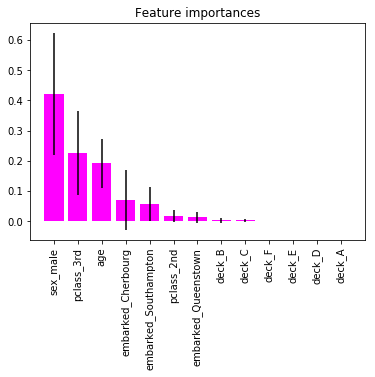

In [91]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="fuchsia", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation="vertical")
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
X.columns

In [31]:
# Extract single tree
estimator = rf.estimators_[5]

# specific module needed
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
# specific library to install
import pydot 
dot_data = StringIO() 
export_graphviz(estimator, feature_names=X.columns,class_names = ['Perished', 'Survived'],out_file=dot_data,
                filled= True,leaves_parallel=False , impurity=True, node_ids=False, proportion=True, rotate=False, 
                rounded=True, special_characters=False, precision=1) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("titanicTree.pdf") 

In [35]:
# Read the Titanic_test.csv file here
#data is a dataframe 
data = pd.read_csv('titanic_test.csv')

# Extract the pclass, age and sex into a new Dataframe
column_list = ['survived','pclass', 'age', 'sex','room', 'embarked','ticket','boat','home.dest']
titanic_test = data[column_list]

In [36]:
expanded_test =pd.get_dummies(titanic_test, columns=['pclass','sex'], drop_first = True)
expanded_test =pd.get_dummies(expanded_test, columns=['embarked'], drop_first = False)


In [38]:
expanded_test['age'].fillna(median_age, inplace = True)
'''
expanded_test['room'] = expanded_test['room'].isna().astype(int)

expanded_test[['ticket','boat','home.dest']] =expanded_test[
    ['ticket','boat','home.dest']].isna().astype(int)
'''
Y = expanded_test['survived']

X= expanded_test[['age',  'pclass_2nd', 'pclass_3rd', 'sex_male', 'embarked_Cherbourg', 'embarked_Queenstown',
       'embarked_Southampton']]


print(len(X), len(Y))


394 394


In [39]:
prediction = pd.Series(rf.predict(X))
survivors = data[['name']]
survivors['prediction']= prediction
survivors['actual']=data[['survived']]
print(survivors)

                                                 name  prediction  actual
0                                     Cann, Mr Ernest           0       0
1    Taylor, Mrs Elmer Zebley (Juliet Cummins Wright)           1       1
2                              Kent, Mr Edward Austin           0       0
3                           Abelseth, Miss Anna Karen           0       1
4                                    Hold, Mr Stephen           0       0
5                                   Hickman, Mr Lewis           0       0
6                           Norman, Mr Robert Douglas           0       0
7                          Kink, Miss Louise Gretchen           0       1
8                            Van Impe, Miss Catharine           0       0
9                                      Mack, Mrs Mary           1       0
10                                 Buckley, Mr Daniel           0       1
11                              Natsch, Mr Charles H.           0       0
12                            Johnston

In [40]:
accuracy = rf.score(X, Y)
print('My first model accuracy is = {}%'.format(accuracy*100))

My first model accuracy is = 82.99492385786802%
